<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS646/blob/main/Pulsed_NMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pylab as plt
from scipy.stats import linregress
from scipy import optimize
from google.colab import files
%pylab inline
#plt.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Exponential Curve Fit

In [103]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

Finding T1

In [104]:
x1 = [0.0001,0.0010,0.0030,0.0050,0.0090,0.0150,0.0200,0.0250,0.0300,0.0325,0.0350,0.0360,0.0365,0.0370,0.0380,0.0390,0.0400,0.0425,0.0450,0.0475,0.0500,0.0525,0.0550]
y1 = [4.00,3.84,3.44,3.12,2.60,1.84,1.40,0.920,0.496,0.316,0.144,0.084,0.064,0.052,0.092,0.160,0.232,0.380,0.524,0.640,0.768,0.896,1.00]
x1err = [.00005 for x in range(len(x1))]
y1err = [.005 for x in range(len(y1))]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

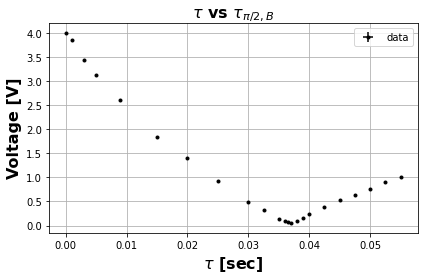

In [105]:
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(x1,y1, xerr=x1err, yerr=y1err, fmt=".k", label="data")
ax.set_title(r'$\tau$ vs $\tau_{\pi/2,B}$ ', fontsize=16, fontweight='bold')
ax.set_xlabel(r'$\tau$ [sec]', fontsize=16, fontweight='bold')
ax.set_ylabel(r'Voltage [V]', fontsize=16, fontweight='bold')
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig('T1.png')
files.download('T1.png')

Finding T2

In [106]:
x2 = [.0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .0010, .0011]
y2 = [3.680, 3.520, 3.380, 3.220, 3.040, 2.900, 2.780, 2.660, 2.540, 2.440]
y2err = [.0005 for x in range(len(y2))]

In [107]:
guess = [3.7,100,0]
popt, pcov = optimize.curve_fit(func,x2,y2, p0=guess)
print(popt, pcov)

[3.61406693e+00 5.48996916e+02 4.55027730e-01] [[ 1.77514043e-01 -4.02595194e+01 -1.88160039e-01]
 [-4.02595194e+01  9.22950031e+03  4.28270433e+01]
 [-1.88160039e-01  4.28270433e+01  1.99705215e-01]]


In [108]:
y3 = [popt[0]*np.exp(-x*popt[1])+popt[2] for x in x2]
print(1/popt[1], np.sqrt(np.diag(pcov))/(9.22950031*10**3)**2)

0.001821503858515803 [4.94606683e-09 1.12780163e-06 5.24612127e-09]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

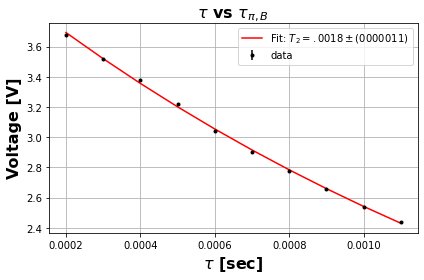

In [109]:
fig2, ax2 = plt.subplots(figsize=(6,4))
ax2.errorbar(x2,y2, yerr=y2err, fmt=".k", label="data")
ax2.plot(x2, y3, 'r-', label=r'Fit: $T_2=.0018\pm(0000011)$')
ax2.set_title(r'$\tau$ vs $\tau_{\pi,B}$ ', fontsize=16, fontweight='bold')
ax2.set_xlabel(r'$\tau$ [sec]', fontsize=16, fontweight='bold')
ax2.set_ylabel(r'Voltage [V]', fontsize=16, fontweight='bold')
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.savefig('T2.png')
files.download('T2.png')